In [271]:
# Importing files
# NB! Remember to always run this block before anything else in main; so that main always is updated:)  

%run d.ipynb
%run Fractal.ipynb
%run eigenvalue_problem.ipynb
%run find_points.ipynb

# ----------------------------------------------------------------------------

import numpy as np
import time
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import scipy.sparse.linalg
from shapely.geometry import Point, Polygon

### Task 1

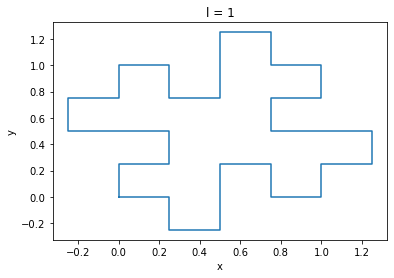

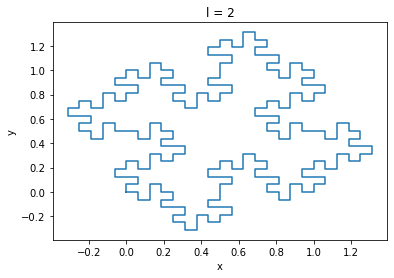

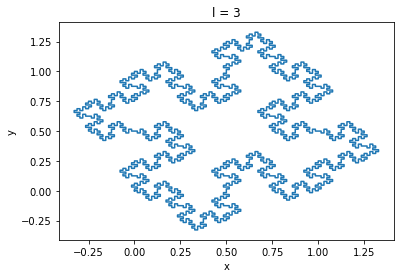

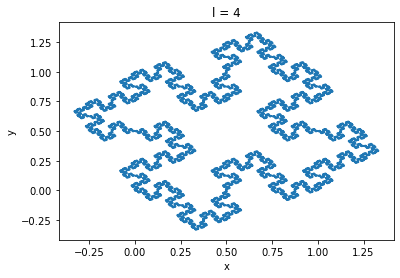

In [142]:
l1 = 1
l2 = 2
l3 = 3
l4 = 4
l5 = 5

frac1 = fractal_generator(l1,1)
frac2 = fractal_generator(l2,1)
frac3 = fractal_generator(l3,1)
frac4 = fractal_generator(l4,1)
frac5 = fractal_generator(l5,1)

# Plotting ---------------------------------------
plt.plot(frac1[:,0],frac1[:,1])
plt.title('l = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task1/L1fractal.png')
plt.show()

plt.plot(frac2[:,0],frac2[:,1])
plt.title('l = 2')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task1/L2fractal.png')
plt.show()

plt.plot(frac3[:,0],frac3[:,1])
plt.title('l = 3')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task1/L3fractal.png')
plt.show()

plt.plot(frac4[:,0],frac4[:,1])
plt.title('l = 4')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task1/L4fractal.png')
plt.show()

#------------------------



### Task 2

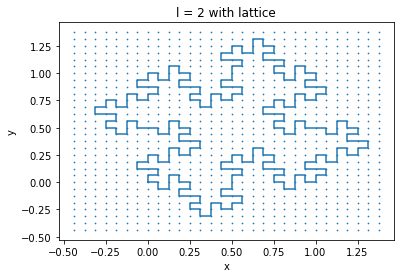

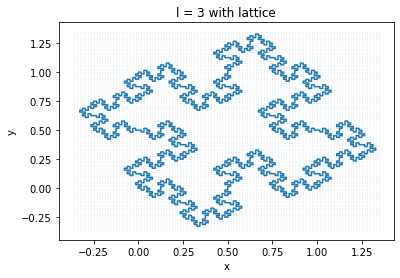

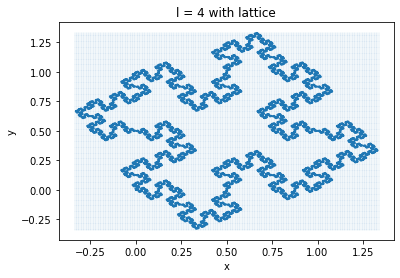

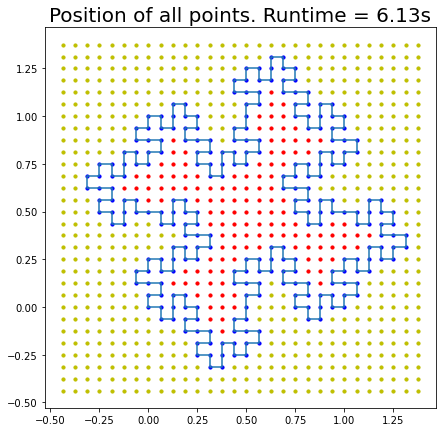

In [143]:

# Find lattice ---------------------------------------------------------------------------------
x_grid2,y_grid2 = make_lattice(frac2)
xv2,yv2 = np.meshgrid(x_grid2,y_grid2)

x_grid3,y_grid3 = make_lattice(frac3)
xv3,yv3 = np.meshgrid(x_grid3,y_grid3)

x_grid4,y_grid4 = make_lattice(frac4)
xv4,yv4 = np.meshgrid(x_grid4,y_grid4)

x_grid5,y_grid5 = make_lattice(frac5)
#xv4,yv4 = np.meshgrid(x_grid4,y_grid4)

# Plotting 
plt.scatter(xv2,yv2,s=0.5)
plt.title('l = 2 with lattice')
plt.plot(frac2[:,0], frac2[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task2/L2fractalLattice.png')
plt.show()

plt.scatter(xv3,yv3,s=0.001)
plt.title('l = 3 with lattice')
plt.plot(frac3[:,0], frac3[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task2/L3fractalLattice.png')
plt.show()

plt.scatter(xv4,yv4,s=0.0001)
plt.title('l = 4 with lattice')
plt.plot(frac4[:,0], frac4[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task2/L4fractalLattice.png')
plt.show()


# which points are inside ------------------------------------------------------------------------------

plot_all_points(frac2, where_is_point_3)


### Task 3


In [44]:
# sammenligne to metoder 

# make the grid
grid2 = np.zeros((len(x_grid2)*len(y_grid2),2))
grid3 = np.zeros((len(x_grid3)*len(y_grid3),2))
grid4 = np.zeros((len(x_grid4)*len(y_grid4),2))

ink = 0
for i in range(len(x_grid2)):
    for j in range(len(y_grid2)):
        grid2[ink] = np.array([x_grid2[i], y_grid2[j]])
        ink += 1

ink = 0
for i in range(len(x_grid3)):
    for j in range(len(y_grid3)):
        grid3[ink] = np.array([x_grid3[i], y_grid3[j]])
        ink += 1

ink = 0
for i in range(len(x_grid4)):
    for j in range(len(y_grid4)):
        grid4[ink] = np.array([x_grid4[i], y_grid4[j]])
        ink += 1

# Methods l = 2
points21, time21 = num_of_point_inside_fractal(grid2, frac2,1,x_grid2,y_grid2,1)
points21_out, time21_out = num_of_point_inside_fractal(grid2, frac2,0,x_grid2,y_grid2,1)
points21_border, time21_border = num_of_point_inside_fractal(grid2, frac2,2,x_grid2,y_grid2,1)

points22, time22 = num_of_point_inside_fractal(grid2, frac2,1,x_grid2,y_grid2,2)
points22_out, time22_out = num_of_point_inside_fractal(grid2, frac2,0,x_grid2,y_grid2,2)
points22_border, time22_border = num_of_point_inside_fractal(grid2, frac2,2,x_grid2,y_grid2,2)

# l = 3 
points31, time31 = num_of_point_inside_fractal(grid3, frac3,1,x_grid3,y_grid3,1)
points31_out, time31_out = num_of_point_inside_fractal(grid3, frac3,0,x_grid3,y_grid3,1)
points31_border, time31_border = num_of_point_inside_fractal(grid3, frac3,2,x_grid3,y_grid3,1)

points32, time32 = num_of_point_inside_fractal(grid3, frac3,1,x_grid3,y_grid3,2)
points32_out, time32_out = num_of_point_inside_fractal(grid3, frac3,0,x_grid3,y_grid3,2)
points32_border, time32_border = num_of_point_inside_fractal(grid3, frac3,2,x_grid3,y_grid3,2)
'''
# l = 4
points41, time41 = num_of_point_inside_fractal(grid4, frac4,1,x_grid4,y_grid4,1)
points41_out, time41_out = num_of_point_inside_fractal(grid4, frac4,0,x_grid4,y_grid4,1)
points41_border, time41_border = num_of_point_inside_fractal(grid4, frac4,2,x_grid4,y_grid4,1)

points42, time42 = num_of_point_inside_fractal(grid4, frac4,1,x_grid4,y_grid4,2)
points42_out, time42_out = num_of_point_inside_fractal(grid4, frac4,0,x_grid4,y_grid4,2)
points42_border, time42_border = num_of_point_inside_fractal(grid4, frac4,2,x_grid4,y_grid4,2)
'''

her nå
her nåå
her nååå


'\n# l = 4\npoints41, time41 = num_of_point_inside_fractal(grid4, frac4,1,x_grid4,y_grid4,1)\npoints41_out, time41_out = num_of_point_inside_fractal(grid4, frac4,0,x_grid4,y_grid4,1)\npoints41_border, time41_border = num_of_point_inside_fractal(grid4, frac4,2,x_grid4,y_grid4,1)\n\npoints42, time42 = num_of_point_inside_fractal(grid4, frac4,1,x_grid4,y_grid4,2)\npoints42_out, time42_out = num_of_point_inside_fractal(grid4, frac4,0,x_grid4,y_grid4,2)\npoints42_border, time42_border = num_of_point_inside_fractal(grid4, frac4,2,x_grid4,y_grid4,2)\n'

In [45]:
# Results 
print('L = 2')
print(f"Points inside: method 1: {points21}. Runtime is {time21}. method 2: {points22}, runtime {time22}")
print(f"Points on border: method 1: {points21_border}. Runtime is {time21_border}. method 2: {points22_border}, runtime {time22_border}")
print(f"Points inside: method 1: {points21_out}. Runtime is {time21_out}. method 2: {points22_out}, runtime {time22_out}")

print('L = 3')
print(f"Points inside: method 1: {points31}. Runtime is {time31}. method 2: {points32}, runtime {time32}")
print(f"Points inside: method 1: {points31_border}. Runtime is {time31_border}. method 2: {points32_border}, runtime {time32_border}")
print(f"Points inside: method 1: {points31_out}. Runtime is {time31_out}. method 2: {points32_out}, runtime {time32_out}")


L = 2
Points inside: method 1: 129. Runtime is 0.25146007537841797. method 2: 129, runtime 3.0269947052001953
Points on border: method 1: 256. Runtime is 0.2791595458984375. method 2: 256, runtime 2.925685167312622
Points inside: method 1: 515. Runtime is 0.2563760280609131. method 2: 515, runtime 2.909806966781616
L = 3
Points inside: method 1: 3073. Runtime is 27.428412914276123. method 2: 3073, runtime 303.15321588516235
Points inside: method 1: 2048. Runtime is 26.920158624649048. method 2: 2048, runtime 301.52037262916565
Points inside: method 1: 6979. Runtime is 26.648913621902466. method 2: 6979, runtime 302.8792908191681


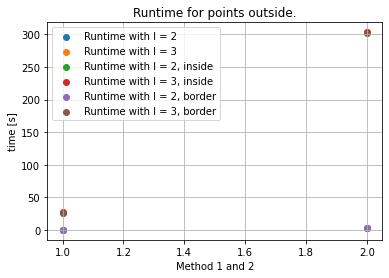

In [51]:
timetotL2_out = [time21_out,time22_out]
timetotL3_out = [time31_out,time32_out]

timetotL2_border = [time21_border,time22_border]
timetotL3_border = [time31_border,time32_border]

timetotL2 = [time21,time22]
timetotL3 = [time31,time32]


x_plot = np.arange(1,3,1)

# ----------------------------------------------------------------
plt.scatter(x_plot,timetotL2_out, label= "Runtime with l = 2")
plt.scatter(x_plot,timetotL3_out, label= "Runtime with l = 3")
plt.scatter(x_plot,timetotL2, label= "Runtime with l = 2, inside")
plt.scatter(x_plot,timetotL3, label= "Runtime with l = 3, inside")
plt.scatter(x_plot,timetotL2_border, label= "Runtime with l = 2, border")
plt.scatter(x_plot,timetotL3_border, label= "Runtime with l = 3, border")

plt.title('Runtime for points outside.')
plt.legend()
plt.xlabel("Method 1 and 2")
plt.ylabel("time [s]")
plt.grid()
plt.savefig('/Users/simon/Downloads/numfys/A3/images/task3/plotwithRuntimes.png')
plt.show()



### Task 4


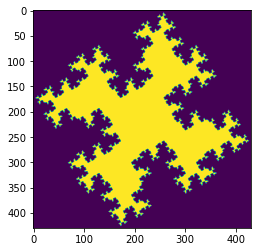

In [302]:
# eigenvalues
boolean_grid = make_boolean_grid(x_grid4, y_grid4, frac4)
not_flat, flat_grid = flatten_fractal(boolean_grid)
Laplace = find_eigenvalue(flat_grid)


eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(Laplace, 60, which = 'SA')




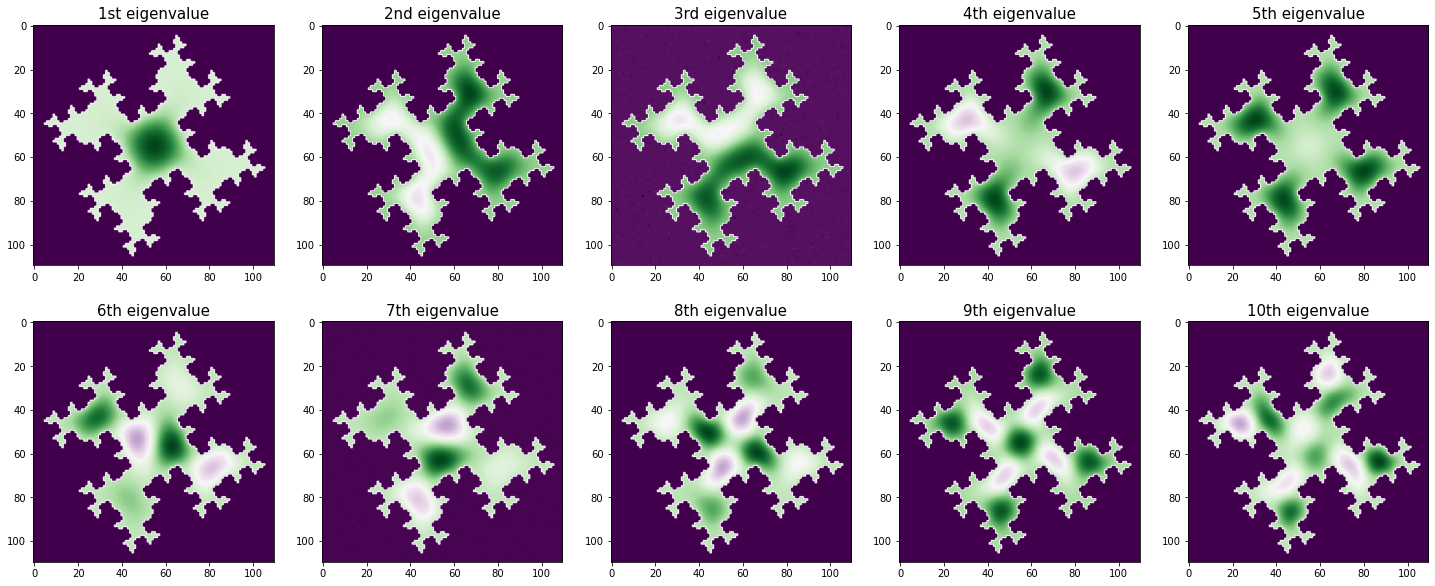

Eigenvalues: 

 1st 0.02168970921008671 

 2nd 0.04883035697035406 

 3rd 0.04973933912201761 

 4th 0.05073655064679429 

 5th 0.051243487916282686 

 6th 0.0554244305813005 

 7th 0.05564504274196503 

 8th 0.07592724829500157 

 9th 0.08707310812261872 

 10th 0.0920662307803253


In [242]:
fig_eig, ax_eig = plt.subplots(2,5, figsize = (25,10))


start = 27


ax_eig[0][0].imshow(plot_vector(eigenvectors[:,start], not_flat,x_grid3,y_grid3),cmap='PRGn')

ax_eig[0][0].set_title('1st eigenvalue', fontsize = 15)

ax_eig[0][1].imshow(plot_vector(eigenvectors[:,start +1], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[0][1].set_title('2nd eigenvalue', fontsize = 15)

ax_eig[0][2].imshow(plot_vector(eigenvectors[:,start +2], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[0][2].set_title('3rd eigenvalue', fontsize = 15)

ax_eig[0][3].imshow(plot_vector(eigenvectors[:, start +3], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[0][3].set_title('4th eigenvalue', fontsize = 15)

ax_eig[0][4].imshow(plot_vector(eigenvectors[:,start+4], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[0][4].set_title('5th eigenvalue', fontsize = 15)

ax_eig[1][0].imshow(plot_vector(eigenvectors[:,start+5], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[1][0].set_title('6th eigenvalue', fontsize = 15)

ax_eig[1][1].imshow(plot_vector(eigenvectors[:,start+6], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[1][1].set_title('7th eigenvalue', fontsize = 15)

ax_eig[1][2].imshow(plot_vector(eigenvectors[:,start+7], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[1][2].set_title('8th eigenvalue', fontsize = 15)

ax_eig[1][3].imshow(plot_vector(eigenvectors[:,start+8], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[1][3].set_title('9th eigenvalue', fontsize = 15)

ax_eig[1][4].imshow(plot_vector(eigenvectors[:,start+9], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig[1][4].set_title('10th eigenvalue', fontsize = 15)

plt.savefig('/Users/simon/Downloads/numfys/A3/images/task4/eigenvectorsl3.png')

plt.show()

first = start
print('Eigenvalues: \n')
print(f' 1st {eigenvalues[first]} \n')
print(f' 2nd {eigenvalues[first +1]} \n')
print(f' 3rd {eigenvalues[first +2]} \n')
print(f' 4th {eigenvalues[first +3]} \n')
print(f' 5th {eigenvalues[first +4]} \n')
print(f' 6th {eigenvalues[first +5]} \n')
print(f' 7th {eigenvalues[first +6]} \n')
print(f' 8th {eigenvalues[first +7]} \n')
print(f' 9th {eigenvalues[first +8]} \n')
print(f' 10th {eigenvalues[first +9]}')

### Task 6

<ipython-input-303-88dda7a0095a>:1: RuntimeWarning: invalid value encountered in sqrt
  N, w = count(np.sqrt(eigenvalues[start:]))


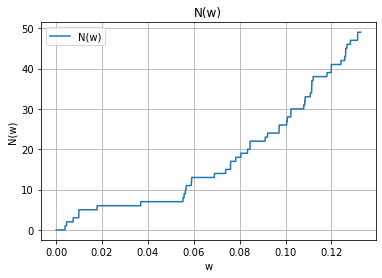

<ipython-input-303-88dda7a0095a>:12: RuntimeWarning: invalid value encountered in sqrt
  dN,d,w_d = d_estimate(np.sqrt(eigenvalues[start:]))
<ipython-input-271-152a3dcdee10>:23: RuntimeWarning: divide by zero encountered in log
  d = np.log(deltaN) - np.log(w)
<ipython-input-271-152a3dcdee10>:23: RuntimeWarning: invalid value encountered in log
  d = np.log(deltaN) - np.log(w)
<ipython-input-271-152a3dcdee10>:23: RuntimeWarning: invalid value encountered in subtract
  d = np.log(deltaN) - np.log(w)


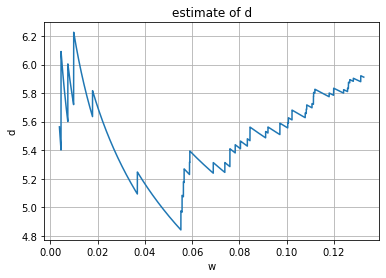

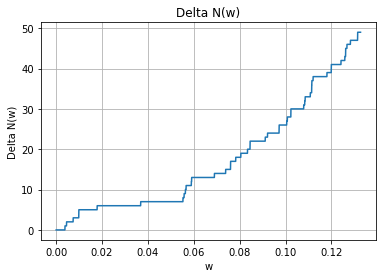

In [303]:
N, w = count(np.sqrt(eigenvalues[start:]))

plt.plot(w,N, label="N(w)")
plt.grid()
plt.title("N(w)")
plt.ylabel('N(w)')
plt.xlabel('w')
plt.legend()
#plt.savefig('/Users/simon/Downloads/numfys/A3/images/task6/N3.png')
plt.show()
#--------------------------------------------------
dN,d,w_d = d_estimate(np.sqrt(eigenvalues[start:]))

plt.plot(w_d[1:],d[1:])
plt.grid()
plt.title('estimate of d')
plt.xlabel('w')
plt.ylabel('d')
#plt.savefig('/Users/simon/Downloads/numfys/A3/images/task6/d3.png')
plt.show()
#----------------------------------------------------
plt.plot(w_d[1:],dN[1:])
plt.grid()
plt.title('Delta N(w)')
plt.xlabel('w')
plt.ylabel('Delta N(w)')
#plt.savefig('/Users/simon/Downloads/numfys/A3/images/task6/ND3.png')
plt.show()
# 120 

### Task 7

In [235]:
# higher order


eigenvalues_higher, eigenvectors_higher = higher_order(flat_grid)


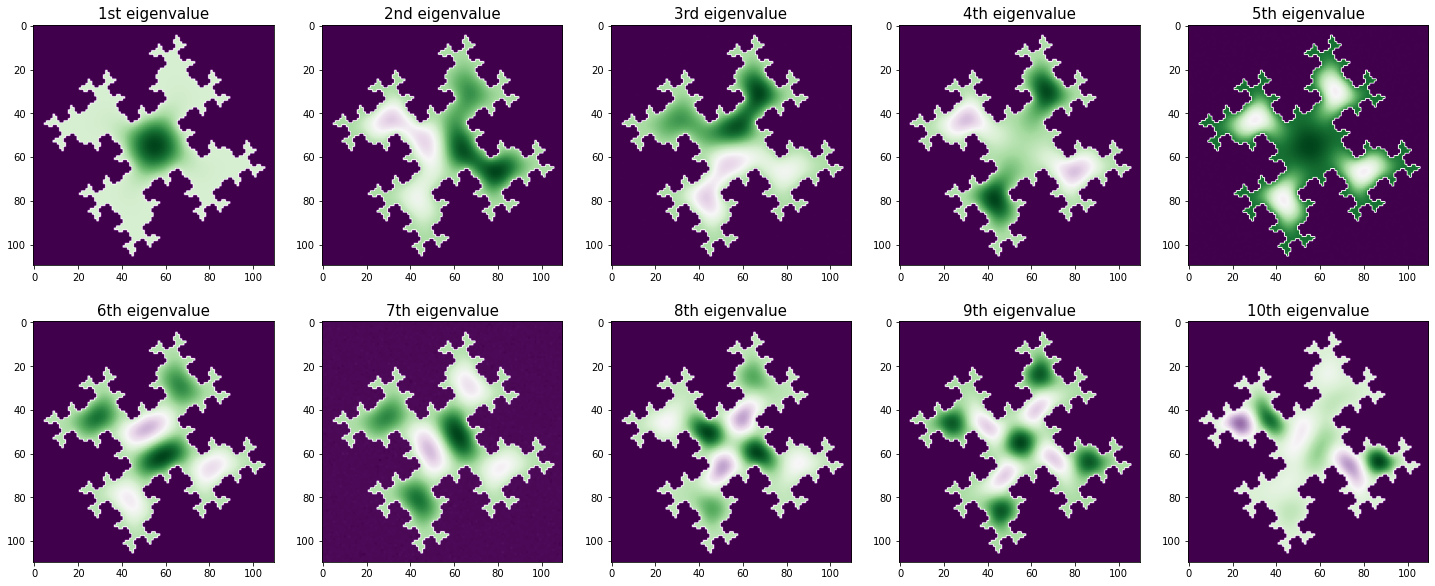

Eigenvalues: 

 1st 0.2634796428557915 

 2nd 0.5975815852299429 

 3rd 0.5984120874767971 

 4th 0.6215970235689157 

 5th 0.6274824249030457 

 6th 0.6746760397351796 

 7th 0.6778376758665496 

 8th 0.926374031734957 

 9th 1.0645747433016308 

 10th 1.126131505521465


In [239]:
fig_eig_high, ax_eig_high = plt.subplots(2,5, figsize = (25,10))

start = 27
ax_eig_high[0][0].imshow(plot_vector(eigenvectors_higher[:,start], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][0].set_title('1st eigenvalue', fontsize = 15)

ax_eig_high[0][1].imshow(plot_vector(eigenvectors_higher[:,start +1], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][1].set_title('2nd eigenvalue', fontsize = 15)

ax_eig_high[0][2].imshow(plot_vector(eigenvectors_higher[:,start +2], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][2].set_title('3rd eigenvalue', fontsize = 15)

ax_eig_high[0][3].imshow(plot_vector(eigenvectors_higher[:, start +3], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][3].set_title('4th eigenvalue', fontsize = 15)

ax_eig_high[0][4].imshow(plot_vector(eigenvectors_higher[:,start+4], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][4].set_title('5th eigenvalue', fontsize = 15)

ax_eig_high[1][0].imshow(plot_vector(eigenvectors_higher[:,start+5], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][0].set_title('6th eigenvalue', fontsize = 15)

ax_eig_high[1][1].imshow(plot_vector(eigenvectors_higher[:,start+6], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][1].set_title('7th eigenvalue', fontsize = 15)

ax_eig_high[1][2].imshow(plot_vector(eigenvectors_higher[:,start+7], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][2].set_title('8th eigenvalue', fontsize = 15)

ax_eig_high[1][3].imshow(plot_vector(eigenvectors_higher[:,start+8], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][3].set_title('9th eigenvalue', fontsize = 15)

ax_eig_high[1][4].imshow(plot_vector(eigenvectors_higher[:,start+9], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][4].set_title('10th eigenvalue', fontsize = 15)

plt.savefig('/Users/simon/Downloads/numfys/A3/images/task7/higherorderl3.png')

plt.show()

first = start
print('Eigenvalues: \n')
print(f' 1st {eigenvalues_higher[first]} \n')
print(f' 2nd {eigenvalues_higher[first +1]} \n')
print(f' 3rd {eigenvalues_higher[first +2]} \n')
print(f' 4th {eigenvalues_higher[first +3]} \n')
print(f' 5th {eigenvalues_higher[first +4]} \n')
print(f' 6th {eigenvalues_higher[first +5]} \n')
print(f' 7th {eigenvalues_higher[first +6]} \n')
print(f' 8th {eigenvalues_higher[first +7]} \n')
print(f' 9th {eigenvalues_higher[first +8]} \n')
print(f' 10th {eigenvalues_higher[first +9]}')

### Task 8

In [272]:
eigenvalues_clamped, eigenvectors_clamped = clampedThinPlate(boolean_grid, 40)



c:\Users\simon\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


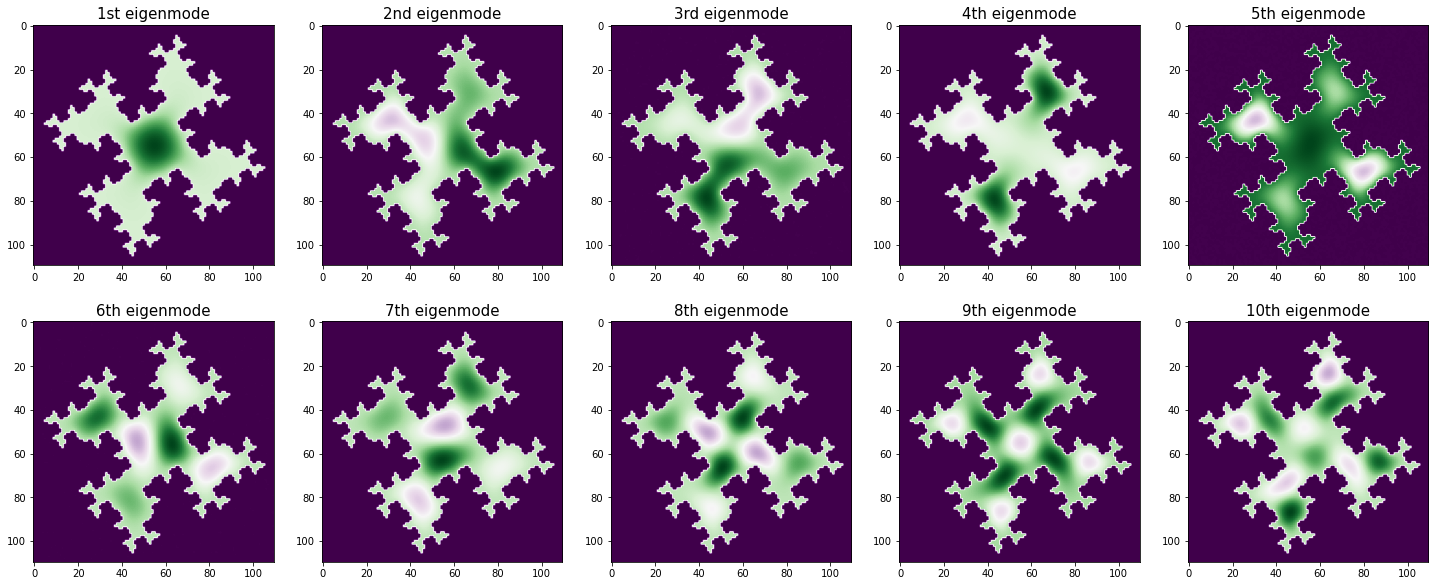

Eigenvalues: 

 1st 0.00046805237545470666 

 2nd 0.002377320415188721 

 3rd 0.002415538166790286 

 4th 0.0025505841182739885 

 5th 0.0025972993175670837 

 6th 0.0030644580723729535 

 7th 0.0030647051670537723 

 8th 0.005756676457174524 

 9th 0.007575404367874867 

 10th 0.00846908610381893


In [283]:
fig_eig_high, ax_eig_high = plt.subplots(2,5, figsize = (25,10))

start = 7

ax_eig_high[0][0].imshow(plot_vector(eigenvectors_clamped[:,start], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][0].set_title('1st eigenmode', fontsize = 15)

ax_eig_high[0][1].imshow(plot_vector(eigenvectors_clamped[:,start+5], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][1].set_title('2nd eigenmode', fontsize = 15)

ax_eig_high[0][2].imshow(plot_vector(eigenvectors_clamped[:,start +6], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][2].set_title('3rd eigenmode', fontsize = 15)

ax_eig_high[0][3].imshow(plot_vector(eigenvectors_clamped[:, start +7], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][3].set_title('4th eigenmode', fontsize = 15)

ax_eig_high[0][4].imshow(plot_vector(eigenvectors_clamped[:,start+8], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[0][4].set_title('5th eigenmode', fontsize = 15)

ax_eig_high[1][0].imshow(plot_vector(eigenvectors_clamped[:,start+10], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][0].set_title('6th eigenmode', fontsize = 15)

ax_eig_high[1][1].imshow(plot_vector(eigenvectors_clamped[:,start+11], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][1].set_title('7th eigenmode', fontsize = 15)

ax_eig_high[1][2].imshow(plot_vector(eigenvectors_clamped[:,start+12], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][2].set_title('8th eigenmode', fontsize = 15)

ax_eig_high[1][3].imshow(plot_vector(eigenvectors_clamped[:,start+13], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][3].set_title('9th eigenmode', fontsize = 15)

ax_eig_high[1][4].imshow(plot_vector(eigenvectors_clamped[:,start+14], not_flat,x_grid3,y_grid3),cmap='PRGn')
ax_eig_high[1][4].set_title('10th eigenmode', fontsize = 15)

plt.savefig('/Users/simon/Downloads/numfys/A3/images/task8/clamped.png')

plt.show()

first = start
print('Eigenvalues: \n')
print(f' 1st {eigenvalues_clamped[first]} \n')
print(f' 2nd {eigenvalues_clamped[first +5]} \n')
print(f' 3rd {eigenvalues_clamped[first +6]} \n')
print(f' 4th {eigenvalues_clamped[first +7]} \n')
print(f' 5th {eigenvalues_clamped[first +8]} \n')
print(f' 6th {eigenvalues_clamped[first +10]} \n')
print(f' 7th {eigenvalues_clamped[first +11]} \n')
print(f' 8th {eigenvalues_clamped[first +12]} \n')
print(f' 9th {eigenvalues_clamped[first +13]} \n')
print(f' 10th {eigenvalues_clamped[first +14]}')